In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

plt.style.use('ggplot')

import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download set of default stop words and wordnet
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Import file from path
path = f'/content/drive/MyDrive/Colab Notebooks/output/fkss_pos.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,label,score,rating,review,comment,text
0,positive,0.980728,5,Perfect product!,Good product 👍👍👍👍👍 thanks FlipkartREAD MORE,Good product 👍👍👍👍👍 thanks Flipkart
1,positive,0.983053,5,Awesome,Very nice product go fot it ❤️READ MORE,Very nice product go fot it ❤️
2,positive,0.970506,5,Excellent,What a beautiful sunscreen if sweating too muc...,What a beautiful sunscreen if sweating too muc...
3,positive,0.971611,5,Fabulous!,Good 😊👍🏻READ MORE,Good 😊👍🏻
4,positive,0.879352,5,Fabulous!,Osm flipkart i love ponds all producksREAD MORE,Osm flipkart i love ponds all producks


In [ ]:
corpus = []

In [ ]:
df["text"] = df["text"].astype(str)

In [ ]:
# Limit default stop words
stop_words = stopwords.words('english')

# Define set of stop words, decide based on output
stop_words.extend(['sunscreen','product', 'doe', 'sticky', 'white', 'cast', 'using', 'used','give', 'u','one', 'wa', 'good', 'ha', 'gud', 'skin', 'flipkart', 'go', 'really', 'thank', 'nice', 'face', 'use', 'cream'])

In [ ]:
# Remove symbols & special characters to only keep text also lamentize the text
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    ps = WordNetLemmatizer()
    review = [ps.lemmatize(word) for word in review]
    review = [word for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
# add processed text back into the dataframe into a new column
column_values = pd.Series(corpus)
df.insert(loc=6, column='post_text', value=column_values)
positiveText = ' '.join(df['post_text'].tolist())

In [ ]:
df.head(5)

,label,score,rating,review,comment,text,post_text
0,positive,0.980728,5,Perfect product!,Good product 👍👍👍👍👍 thanks FlipkartREAD MORE,Good product 👍👍👍👍👍 thanks Flipkart,thanks
1,positive,0.983053,5,Awesome,Very nice product go fot it ❤️READ MORE,Very nice product go fot it ❤️,fot
2,positive,0.970506,5,Excellent,What a beautiful sunscreen if sweating too muc...,What a beautiful sunscreen if sweating too muc...,beautiful sweating much look glow non grace lo...
3,positive,0.971611,5,Fabulous!,Good 😊👍🏻READ MORE,Good 😊👍🏻,
4,positive,0.879352,5,Fabulous!,Osm flipkart i love ponds all producksREAD MORE,Osm flipkart i love ponds all producks,osm love pond producks


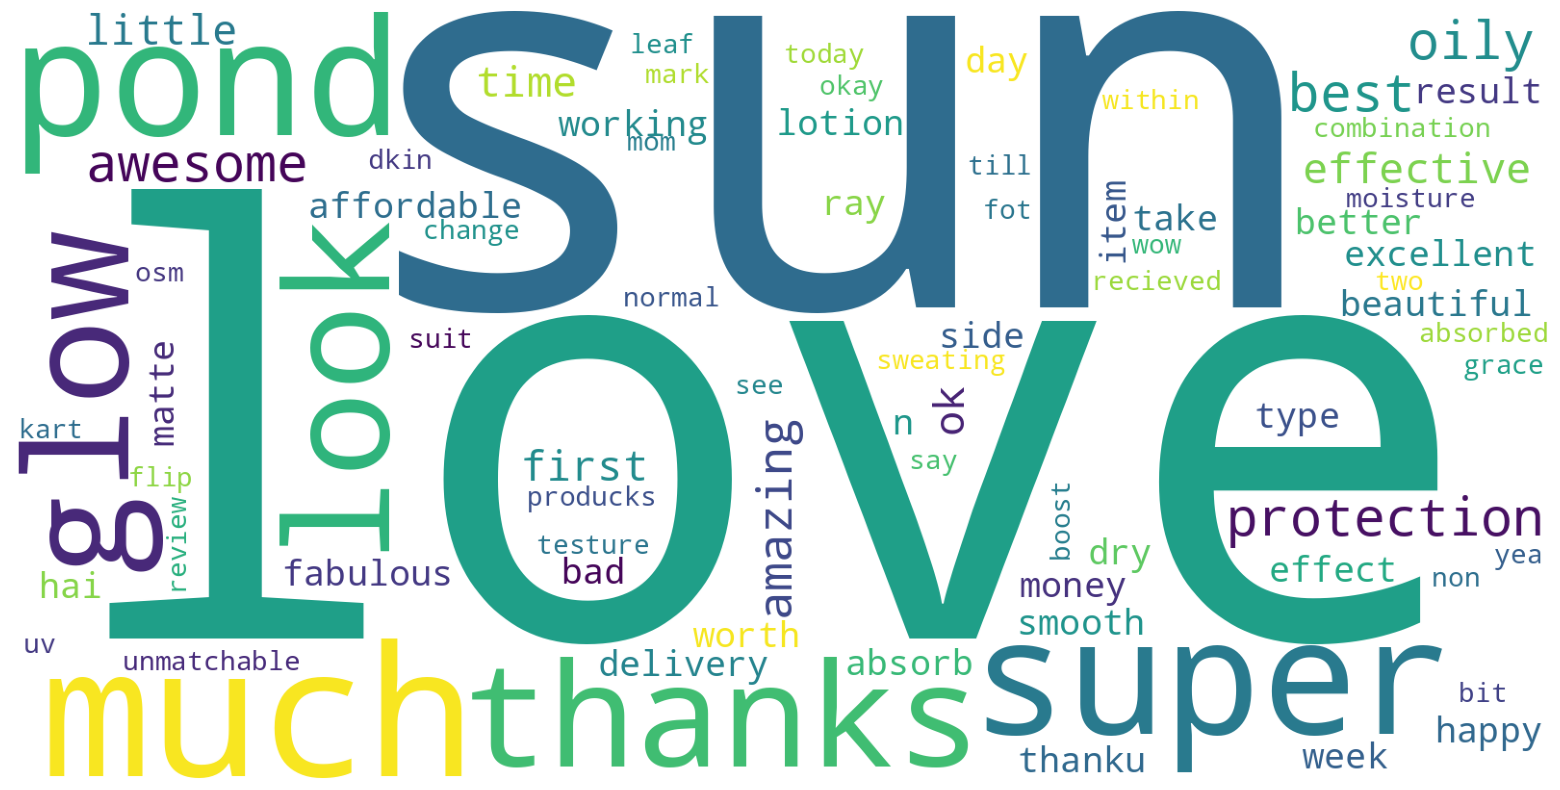

In [ ]:
# Generate word cloud of the group of words
wordcloud = WordCloud(background_color="white",width=1600, height=800, max_words=80, prefer_horizontal=0.91).generate(positiveText)

# Open a plot of the generated image.
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")

#save the image if reqd
plt.savefig('merge_positive.png', bbox_inches='tight')